In [ ]:
!pip install numpy==1.19.3
!pip install mediapipe

  Using cached numpy-1.19.3.zip (7.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for numpy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for numpy
Failed to build numpy
ERROR: Could not build wheels for numpy, which is required to install pyproject.toml-based projects


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving p3.jpg to p3 (2).jpg
Saving p4.jpg to p4 (2).jpg


p3 (2).jpg


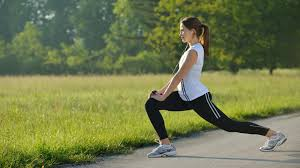

p4 (2).jpg


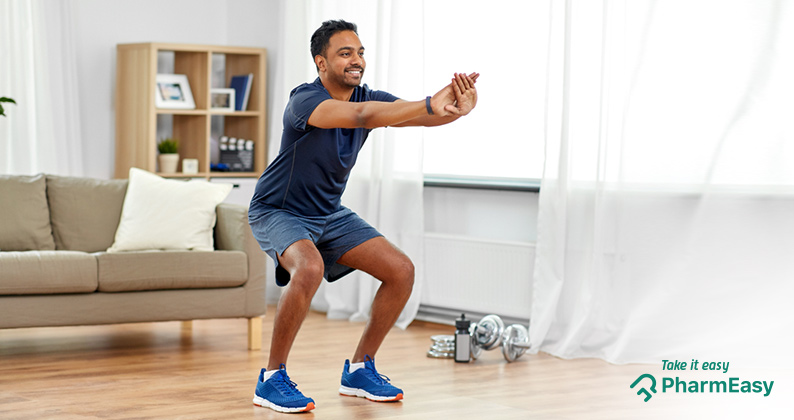

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

#Reload images with OpenCV
images = {name: cv2.imread(name) for name in uploaded.keys()}

#Preview the images
for name, image in images.items():
  print(name)
  cv2_imshow(image)

In [ ]:
import mediapipe as mp
mp_pose = mp.solutions.pose

help(mp_pose.Pose)

#Intialize MediaPipe Pose
pose = mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.5)

Help on class Pose in module mediapipe.python.solutions.pose:

class Pose(mediapipe.python.solution_base.SolutionBase)
 |  Pose(static_image_mode=False, model_complexity=1, smooth_landmarks=True, enable_segmentation=False, smooth_segmentation=True, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |  
 |  MediaPipe Pose.
 |  
 |  MediaPipe Pose processes an RGB image and returns pose landmarks on the most
 |  prominent person detected.
 |  
 |  Please refer to https://solutions.mediapipe.dev/pose#python-solution-api for
 |  usage examples.
 |  
 |  Method resolution order:
 |      Pose
 |      mediapipe.python.solution_base.SolutionBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, static_image_mode=False, model_complexity=1, smooth_landmarks=True, enable_segmentation=False, smooth_segmentation=True, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |      Initializes a MediaPipe Pose object.
 |      
 |      Args:
 |        static_i

In [ ]:
#Prepare DrawingSpec for drawing the face landmarks later.
mp_drawing = mp.solutions.drawing_utils
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

Nose coordinates: (180.66410422325134,34.449434995651245,
Pose landmarks of p3 (2).jpg:


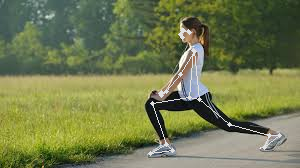

Nose coordinates: (353.2282905578613,62.653820514678955,
Pose landmarks of p4 (2).jpg:


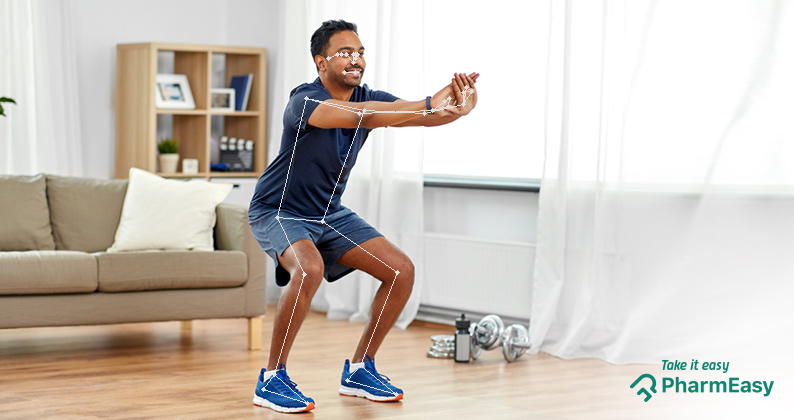

In [ ]:
for name,image in images.items():
  #Convert the BGR images to RGB and process it with MediaPipe Pose
  results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  #Print nose landmark
  image_hight, image_width, _ = image.shape
  if not results.pose_landmarks:
    continue
  print(
      f'Nose coordinates: ('
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width},'
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_hight},'
  )

  #Draw pose landmarks
  print(f'Pose landmarks of {name}:')
  annotated_image = image.copy()
  mp_drawing.draw_landmarks(
      image=annotated_image,
      landmark_list=results.pose_landmarks,
      connections=mp_pose.POSE_CONNECTIONS,
      landmark_drawing_spec=drawing_spec,
      connection_drawing_spec=drawing_spec)
  cv2_imshow(annotated_image)